In [1]:
import json
from ast import literal_eval
from utils.process_training_data import *

In [2]:
dataset_raw = '../raw_data/all.jsonl'

In [3]:
dataset = []
with open(dataset_raw, 'r') as file:
    for line in file:
        dataset.append(literal_eval(line))

In [4]:
labeled_dataset = []
for data in dataset:
    if len(data['label']):
        labeled_dataset.append(data)

In [5]:
len(labeled_dataset)

2484

In [6]:
labeled_dataset[:5]

[{'id': '61a4e863e8bd25803fba8ec6',
  'data': 'cho thuê căn_hộ chung_cư 87 lĩnh nam, hoàng_mai, hà_nội \ndiện_tích: 95 m2 \nthiết_kế: 3 phòng ngủ, 2 vệ_sinh \nnội_thất: đủ đồ \ngiá cho thuê: 10 tr/tháng \nlh xem nhà cam_kết không mất phí giới_thiệu ',
  'label': [[9, 25, 'APARTMENT-TYPE'],
   [25, 56, 'LOCATION'],
   [68, 74, 'AREA'],
   [85, 96, 'ROOM'],
   [98, 107, 'ROOM'],
   [109, 125, 'FURNITURE-TYPE'],
   [140, 151, 'PRICE']]},
 {'id': '61a4e863e8bd25803fba8eca',
  'data': 'chính chủ cho thuê chung_cư 105m2 với 3pn, 2vs, pk, bếp. \ntại toà ct1 khu đô_thị mỹ_đình sông đà, nam từ_liêm, hà_nội. \ngần kengnam, ngay sau big c garden, xung_quanh nhiều tiện_ích như nhà_hàng, hiệu thuốc, trường_học,... \nlà nơi có tốc_độ đô_thị_hoá cao với hàng_loạt các dự_án trọng_điểm về hành_chính, đô_thị, thương_mại, tài_chính và dịch_vụ như: \ntrung_tâm hội_nghị quốc_gia, khu liên_hiệp thể_thao quốc_gia, hệ_thống siêu_thị big c, khu đô_thị mới mỹ_đình i, khu đô_thị mới mỹ_đình ii. \nđã trang_bị điề

In [7]:
list_tags(data_point=labeled_dataset[6])

[['1 - toà nhà newlife apartment2 mới hoàn_thiện số 10 phố nguyen van huyen, với nhiều loại căn_hộ dịch_vụ cho thuê, thích_hợp cho người nước_ngoài, du_lịch ở và công_tác. \ncác căn_hộ thiết_kế theo phong_cách châu_âu: căn_hộ studio, loại căn_hộ 1 phòng ngủ và khách, đầy_đủ nội_thất, đầy_đủ tiện_nghi như bếp nấu_ăn, giường, tủ tivi, điều_hoà, nóng lạnh, tủ_lạnh, thoáng, sạch_sẽ. \ngiá thuê:',
  'O'],
 ['loại 1', 'ID'],
 [':', 'O'],
 ['studio', 'APARTMENT-TYPE'],
 [',', 'O'],
 ['35m2', 'AREA'],
 [', đủ đồ, giá', 'O'],
 ['7.000.000 tr/tháng.', 'PRICE'],
 ['loại 2', 'ID'],
 [':', 'O'],
 ['căn_hộ 1 phòng ngủ', 'APARTMENT-TYPE'],
 ['1 phòng ngủ', 'ROOM'],
 ['và khách,', 'O'],
 ['45m2', 'AREA'],
 ['giá', 'O'],
 ['7.500.000 -10.000.000 tr/th', 'PRICE'],
 ['dịch_vụ: cáp, nước, wifi, don vệ_sinh phòng 2 lần/tuần, bảo_vệ 24 h/24. \nphù_hợp cho người viêt, cán_bộ công_tác, người nhật, hàn, các giáo_viên nước_ngoài, các chuyên_gia nước_ngoài ở, có giấy_phép cho người nước_ngoài. \nvị_trí: toà nhà 

In [8]:
all_tags = []
for data_point in labeled_dataset:
    all_tags.extend(list_tags(data_point=data_point))

In [9]:
all_tags[:10]

[['cho thuê', 'O'],
 ['căn_hộ chung_cư', 'APARTMENT-TYPE'],
 ['87 lĩnh nam, hoàng_mai, hà_nội', 'LOCATION'],
 ['diện_tích:', 'O'],
 ['95 m2', 'AREA'],
 ['thiết_kế:', 'O'],
 ['3 phòng ngủ', 'ROOM'],
 [',', 'O'],
 ['2 vệ_sinh', 'ROOM'],
 ['nội_thất: đủ đồ', 'FURNITURE-TYPE']]

# Visualize entities

In [10]:
tags_dict = {}

In [11]:
for tag in all_tags:
    if tag[1] not in tags_dict.keys():
        tags_dict[tag[1]] = [tag[0]]
    else:
        tags_dict[tag[1]].append(tag[0])

In [12]:
tags_dict.keys()

dict_keys(['O', 'APARTMENT-TYPE', 'LOCATION', 'AREA', 'ROOM', 'FURNITURE-TYPE', 'PRICE', 'CONVENIENT', 'FURNITURE', 'PROJECT', 'ID'])

In [13]:
apart_tag = set(tags_dict['APARTMENT-TYPE'])

In [104]:
num_tags = []
tags = []
for key in tags_dict.keys():
    tags.append(key)
    num_tags.append(len(tags_dict[key]))

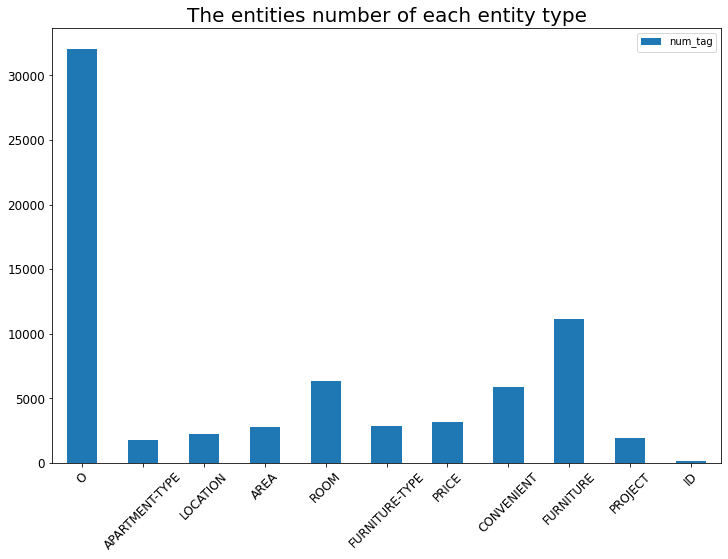

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

number_df1 = pd.DataFrame({'tag': tags, 'num_tag': num_tags})
ax = number_df1.plot.bar(x='tag', y='num_tag', rot=90, figsize=(12, 8), width=0.5)
plt.title('The entities number of each entity type', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.show()

In [89]:
avg_word_tags = []
tags = []
for key in tags_dict.keys():
    tags.append(key)
    total_word = 0
    for text in tags_dict[key]:
        total_word += len(text.split(' '))

    avg_word = round(total_word / len(tags_dict[key]), 2)
    avg_word_tags.append(avg_word)

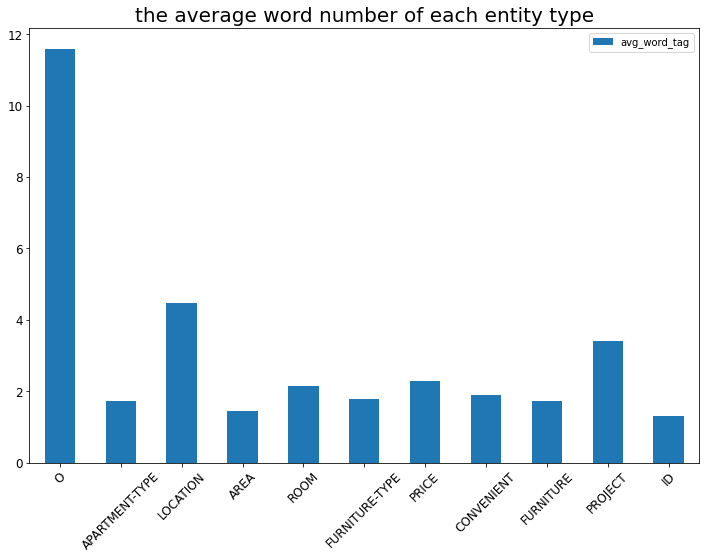

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

avg_df1 = pd.DataFrame({'tag': tags, 'avg_word_tag': avg_word_tags})
ax = avg_df1.plot.bar(x='tag', y='avg_word_tag', rot=90, figsize=(12, 8))
plt.title('the average word number of each entity type', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.show()

In [28]:
# Visualize the number words of other tag
num_word_list = []
for text in tags_dict['O']:
    num_word_list.append(len(text.split(' ')))

num_word_list.sort(reverse=False)

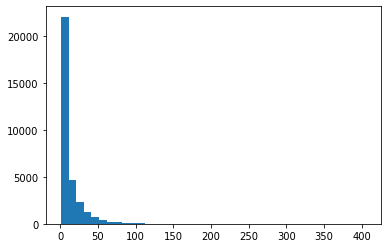

In [30]:
plt.hist(num_word_list, bins=40 )
plt.show()

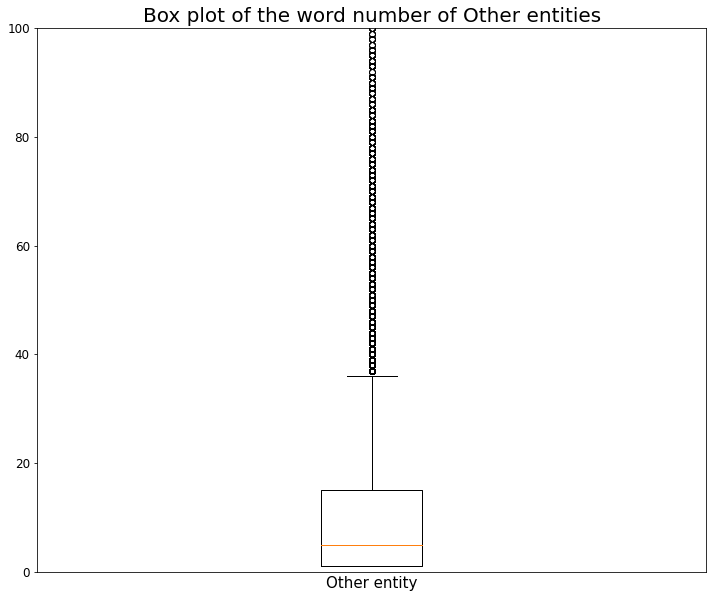

In [37]:
plt.figure(figsize=(12,10))
plt.boxplot([num_word_list], labels=["Num_words"])
plt.xlabel('Other entity', fontsize=15)
plt.xticks([])
plt.yticks(fontsize=12)
plt.ylim([0, 100])
plt.title('Box plot of the word number of Other entities', fontsize=20)
plt.show()

In [38]:
df = pd.DataFrame({'num_words': num_word_list})
q1 = df['num_words'].quantile(0.25)
q3 = df['num_words'].quantile(0.75)
median = df['num_words'].median()
iqr = q3 - q1
maximum = median + 1.5 * iqr
print("median: {}".format(median))
print("q3: {}".format(q3))
print("maximum: {}".format(maximum))

median: 5.0
q3: 15.0
maximum: 26.0


In [39]:
count = 0
for text in tags_dict['O']:
    if maximum >= len(text.split(' ')) >= q3:
        count += 1
        print("=" * 10)
        print(text)

với 3pn, 2vs, pk, bếp. 
tại toà ct1 khu đô_thị mỹ_đình sông đà, nam từ_liêm, hà_nội.
khách thuê có_thể chuyển tới ở ngay. 
phòng rộng thoáng mát, 
giá 12,5 triệu/tháng ( có thoả_thuận ). 

lh chính chủ a công:
. 
cam_kết rẻ nhất. 

ch 3pn ( dt 86m2 - 90m2 - 92 m2 ): giá thuê
( dt 43 - 49 m2 ): giá thuê từ 3 tr - 5 tr/tháng cam_kết rẻ nhất thị_trường. 

ch
( dt - 55m2 - 60m2 - 62m2 - 69 m2 ): giá thuê từ 3.5 tr - 5.2 tr/tháng. 
cam_kết rẻ nhất. 

ch
, có tủ bếp trên và dưới, chậu rửa bát hiện_đại nấu_nướng không sợ mùi vào phòng ngủ và khách.
. 
căn_hộ có cửa_sổ thoáng mát, chỉ việc xách va_li đến ở. 
* giá_cả: 
giá phòng từ
, đầy_đủ nội_thất, đầy_đủ tiện_nghi như bếp nấu_ăn, giường, tủ tivi, điều_hoà, nóng lạnh, tủ_lạnh, thoáng, sạch_sẽ. dt từ 40-45 m2. 
giá thuê: giá thuê từ
, gần nhiều trường_học, văn_phòng làm_việc, các nhà_hàng âu, á phòng phú... 
địa_chỉ: số 20 nguyễn_văn huyên kéo_dài, quan hoa, cầu_giấy. 
liên_hệ chính chủ.
vào ở được luôn. 
toà nhà cách mặt_phố hàm long 30m đườ

In [40]:
count

4174

In [41]:
tags_dict.keys()

dict_keys(['O', 'APARTMENT-TYPE', 'LOCATION', 'AREA', 'ROOM', 'FURNITURE-TYPE', 'PRICE', 'CONVENIENT', 'FURNITURE', 'PROJECT', 'ID'])

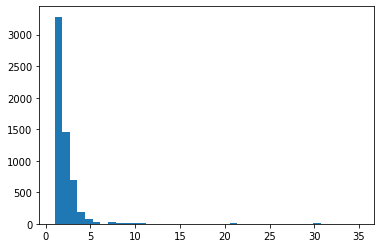

In [42]:
num_word_list = []
for text in tags_dict['CONVENIENT']:
    num_word_list.append(len(text.split(' ')))

num_word_list.sort(reverse=False)
plt.hist(num_word_list, bins=40)
plt.show()

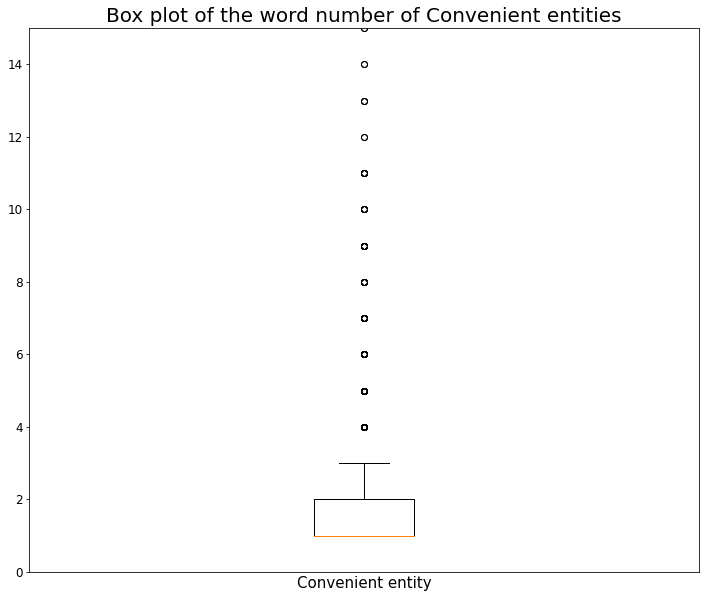

In [46]:
plt.figure(figsize=(12,10))
plt.boxplot([num_word_list], labels=["Num_words"])
plt.xlabel('Convenient entity', fontsize=15)
plt.xticks([])
plt.yticks(fontsize=12)
plt.ylim([0, 15])
plt.title('Box plot of the word number of Convenient entities', fontsize=20)
plt.show()

In [47]:
df = pd.DataFrame({'num_words': num_word_list})
q1 = df['num_words'].quantile(0.25)
q3 = df['num_words'].quantile(0.75)
median = df['num_words'].median()
iqr = q3 - q1
maximum = median + 1.5 * iqr
print("iqr {}".format(iqr))
print("median: {}".format(median))
print("q3: {}".format(q3))
print("maximum: {}".format(maximum))

iqr 1.0
median: 1.0
q3: 2.0
maximum: 2.5


In [48]:
count = 0
for text in tags_dict['CONVENIENT']:
    if len(text.split(' ')) >= 6:
        count += 1
        print("=" * 10)
        print(text)

gần kengnam, ngay sau big c garden, xung_quanh nhiều tiện_ích như nhà_hàng, hiệu thuốc, trường_học
camera an_ninh, đảm_bảo, bảo_vệ 24/2 4h
gửi xe miễn_phí, tối_đa mỗi phòng 2 xe_máy
camera các tầng, có thang_máy tốc_độ cao..
được thiết_kế thông_minh, tiện_lợi, đầy_đủ tiện_ích đi kèm, gồm tầng 1 rộng_rãi để xe rộng_rãi. giao_thông đi_lại thuận_tiện
chỉ 3 phút để tiếp_cận hệ_thống ngân_hàng, siêu_thị, trung_tâm thương_mại, trường_học quốc_tế từ mầm_non đến trung_học, đại_học quanh khu_vực cầu_giấy...
gần nhiều trường_học, văn_phòng làm_việc, các nhà_hàng âu, á phòng phú...
dịch_vụ: cáp, nước, wifi, bảo_vệ 24 h/24.
đủ tiện_ích, đặc_biệt khuôn_viên rộng, 4 quảng_trường, sân_chơi
khu chung_cư đủ mọi tiện_ích sang_trọng: bể_bơi, gym, spa, gần trường_học...
ằm sát đường lớn, thuận_tiện di_chuyển ra sân_bay nội bài và đi các tỉnh. 
_ tiện_ích khu: siêu_thị, phòng gym, bể_bơi, bbq... view sông hồng, cầu nhật tân_.
vị_trí đắc_địa cách cầu chương dương 500m, sang trung_tâm hà_nội chỉ 5 phút đi xe

In [53]:
count

124

In [54]:
len(tags_dict['O'])

32089

In [55]:
tags_dict.keys()

dict_keys(['O', 'APARTMENT-TYPE', 'LOCATION', 'AREA', 'ROOM', 'FURNITURE-TYPE', 'PRICE', 'CONVENIENT', 'FURNITURE', 'PROJECT', 'ID'])

# Split train/val/test

In [59]:
len(labeled_dataset)

2484

In [60]:
import numpy as np
from sklearn.model_selection import train_test_split

In [61]:
nd_dataset = np.array(labeled_dataset)

In [62]:
y = range(len(labeled_dataset))

In [63]:
X_train, X_test, y_train, y_test = train_test_split(nd_dataset, y, test_size=0.3, shuffle=True, random_state=42)

In [64]:
X_val, X_final_test, y_val, y_final_test = train_test_split(X_test, range(len(X_test)), test_size=0.4, shuffle=True, random_state=42)

In [65]:
def process_dataset(data_set: list):
    cleaned_dataset = []

    for data_point in data_set:
        tags_list = list_tags(data_point=data_point)

        # clean outliers tag
        cleaned_tags = []
        for tag in tags_list:
            if tag[1] == 'O' and len(tag[0].split(' ')) >= 15:
                continue
            if tag[1] == 'CONVENIENT' and len(tag[0].split(' ')) >= 6:
                continue
            cleaned_tags.append(tag)

        cleaned_dataset.append(cleaned_tags)

    return cleaned_dataset

In [66]:
def write_to_file(cleaned_dataset, filepath):
    labels_dict = {'O': ['O', 'O'],
                   'APARTMENT-TYPE': ['B-APART', 'I-APART'],
                   'LOCATION': ['B-LOC', 'I-LOC'],
                   'AREA': ['B-AREA', 'I-AREA'],
                   'ROOM': ['B-ROOM', 'I-ROOM'],
                   'FURNITURE-TYPE': ['B-FUR-TYPE', 'I-FUR-TYPE'],
                   'PRICE': ['B-PRICE', 'I-PRICE'],
                   'CONVENIENT': ['B-CONV', 'I-CONV'],
                   'FURNITURE': ['B-FUR', 'I-FUR'],
                   'PROJECT': ['B-PJ', 'I-PJ'],
                   'ID': ['B-ID', 'I-ID']}

    all_tags = []
    for tags in cleaned_dataset:
        all_tags.append('-DOCSTART-')
        all_tags.extend(tags)

    lines = []
    for tag in all_tags:
        if isinstance(tag, str):
            lines.append('-DOCSTART-')
            continue

        text = tag[0]
        label = tag[1]
        words = text.split(' ')

        lines.append(words[0].strip(' \n') + ' ' + labels_dict[label][0])
        for word in words[1:]:
            lines.append(word.strip(' \n') + ' ' + labels_dict[label][1])

    with open(filepath, 'w') as file:
        file.write('\n'.join(lines))

In [67]:
train_clean_tags = process_dataset(list(X_train))

In [68]:
valid_clean_tags = process_dataset(list(X_val))

In [69]:
test_clean_tags = process_dataset(list(X_final_test))

In [30]:
write_to_file(train_clean_tags, filepath='data/train.txt')

In [31]:
write_to_file(valid_clean_tags, filepath='data/dev.txt')

In [32]:
write_to_file(test_clean_tags, filepath='data/test.txt')

# Analyze after cleaned data

In [75]:
cleaned_tags = {}
for data_point in train_clean_tags:
    for tag in data_point:
        if tag[1] not in cleaned_tags.keys():
            cleaned_tags[tag[1]] = [tag[0]]
        else:
            cleaned_tags[tag[1]].append(tag[0])

for data_point in valid_clean_tags:
    for tag in data_point:
        if tag[1] not in cleaned_tags.keys():
            cleaned_tags[tag[1]] = [tag[0]]
        else:
            cleaned_tags[tag[1]].append(tag[0])

for data_point in test_clean_tags:
    for tag in data_point:
        if tag[1] not in cleaned_tags.keys():
            cleaned_tags[tag[1]] = [tag[0]]
        else:
            cleaned_tags[tag[1]].append(tag[0])

In [79]:
cleaned_tags.keys()

dict_keys(['FURNITURE-TYPE', 'CONVENIENT', 'O', 'PRICE', 'ROOM', 'PROJECT', 'AREA', 'APARTMENT-TYPE', 'LOCATION', 'FURNITURE', 'ID'])

In [81]:
list(cleaned_tags.keys()).sort()

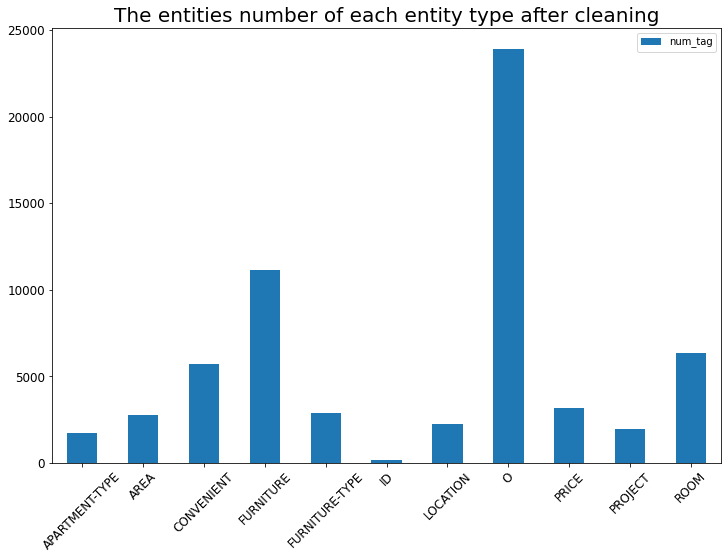

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

num_tags = []
tags = []
for key in sorted(list(cleaned_tags.keys())):
    tags.append(key)
    num_tags.append(len(cleaned_tags[key]))

number_df2 = pd.DataFrame({'tag': tags, 'num_tag': num_tags})
ax = number_df2.plot.bar(x='tag', y='num_tag', rot=45, figsize=(12, 8))
plt.title('The entities number of each entity type after cleaning', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.show()

In [94]:
avg_df1.sort_values('tag', inplace=True)
avg_df1

,tag,avg_word_tag
1,APARTMENT-TYPE,1.73
3,AREA,1.46
7,CONVENIENT,1.90
8,FURNITURE,1.72
5,FURNITURE-TYPE,1.77
10,ID,1.32
2,LOCATION,4.47
0,O,11.60
6,PRICE,2.28
9,PROJECT,3.40


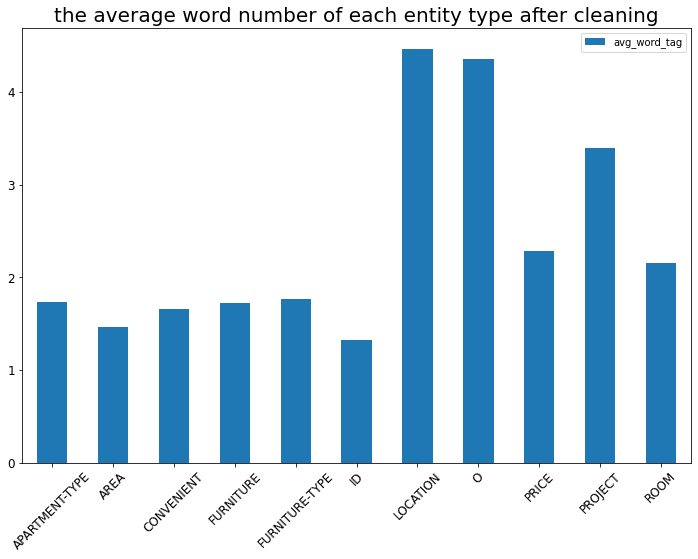

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

avg_word_tags = []
tags = []
for key in sorted(list(cleaned_tags.keys())):
    tags.append(key)
    total_word = 0
    for text in cleaned_tags[key]:
        total_word += len(text.split(' '))

    avg_word = round(total_word / len(cleaned_tags[key]), 2)
    avg_word_tags.append(avg_word)

avg_df2 = pd.DataFrame({'tag': tags, 'avg_word_tag': avg_word_tags})
ax = avg_df2.plot.bar(x='tag', y='avg_word_tag', rot=90, figsize=(12, 8))
plt.title('the average word number of each entity type after cleaning', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.show()

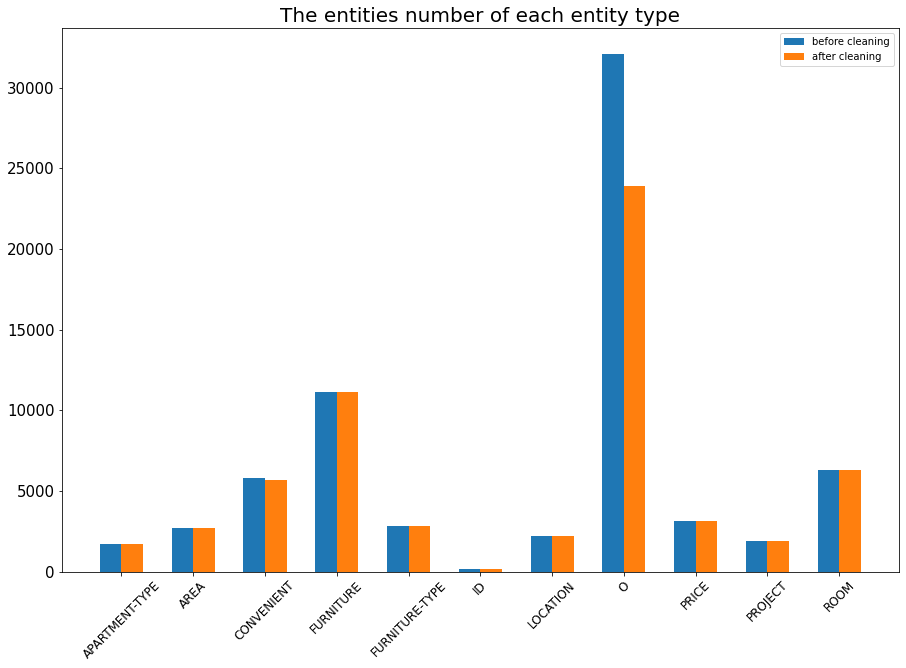

In [113]:
number_df1.sort_values('tag', inplace=True)
number_df2.sort_values('tag', inplace=True)

from matplotlib.pyplot import figure

figure(figsize=(15, 10))

name = list(number_df1['tag'].values)
tag_num_1 = list(number_df1['num_tag'].values)
tag_num_2 = list(number_df2['num_tag'].values)

index = np.arange(len(name))
width = 0.3

# index: 0, 1, 2, 3
plt.bar(index, tag_num_1, width, label='before cleaning')
# index + width: 0.3, 1.3, 2.3, 3.3
plt.bar(index + width, tag_num_2, width, label='after cleaning')
plt.xticks(index + width/2, name, rotation=45, fontsize=12)
plt.title('The entities number of each entity type', fontsize=20)
plt.yticks(fontsize=15)
plt.legend(loc='best')
plt.show()

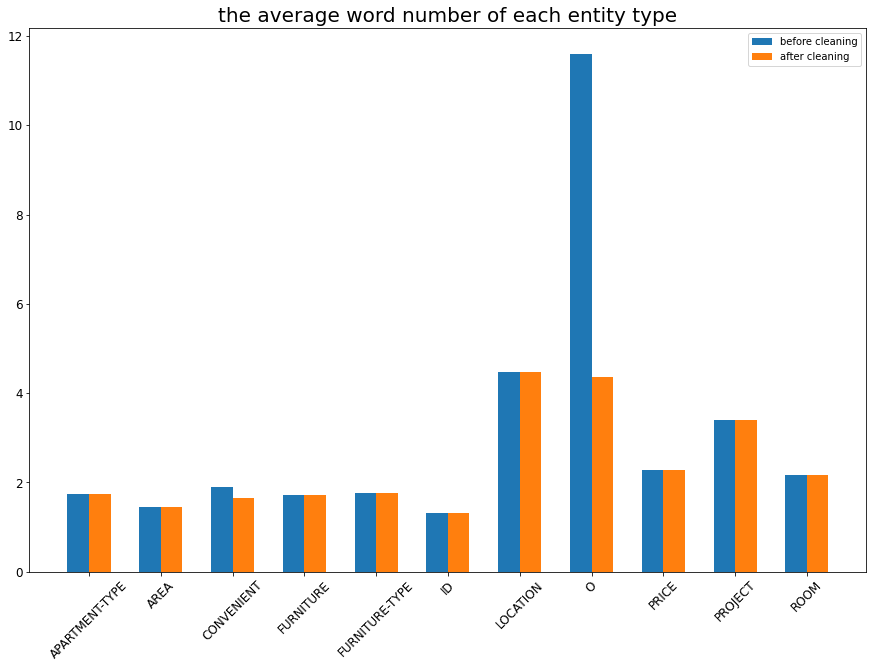

In [114]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10))

name = list(avg_df1['tag'].values)
avg_words_1 = list(avg_df1['avg_word_tag'].values)
avg_words_2 = list(avg_df2['avg_word_tag'].values)

index = np.arange(len(name))
width = 0.3

# index: 0, 1, 2, 3
plt.bar(index, avg_words_1, width, label='before cleaning')
# index + width: 0.3, 1.3, 2.3, 3.3
plt.bar(index + width, avg_words_2, width, label='after cleaning')
plt.xticks(index + width/2, name, rotation=45, fontsize=12)
plt.title('the average word number of each entity type', fontsize=20)
plt.yticks(fontsize=12)

plt.legend(loc='best')
plt.show()

In [95]:
df.sort_values('tag', inplace=True)

In [33]:
len(train_clean_tags)

1738

In [34]:
train_clean_tags[0]

[['full', 'FURNITURE-TYPE'],
 ['thang_máy', 'CONVENIENT'],
 ['rộng, đi_lại nhanh_chóng. \ngiá thuê.', 'O'],
 ['16 tr/tháng', 'PRICE'],
 ['3 phòng ngủ', 'ROOM'],
 ['imperia 203 nguyễn_huy tưởng', 'PROJECT'],
 [', rộng', 'O'],
 ['111m2', 'AREA'],
 ['chcc', 'APARTMENT-TYPE']]

In [35]:
train_num_words = []
for labels in train_clean_tags:
    count = 0
    for tag in labels:
        count += len(tag[0].split(' '))

    train_num_words.append(count)

In [37]:
sum(train_num_words) / len(train_num_words)

73.3590333716916

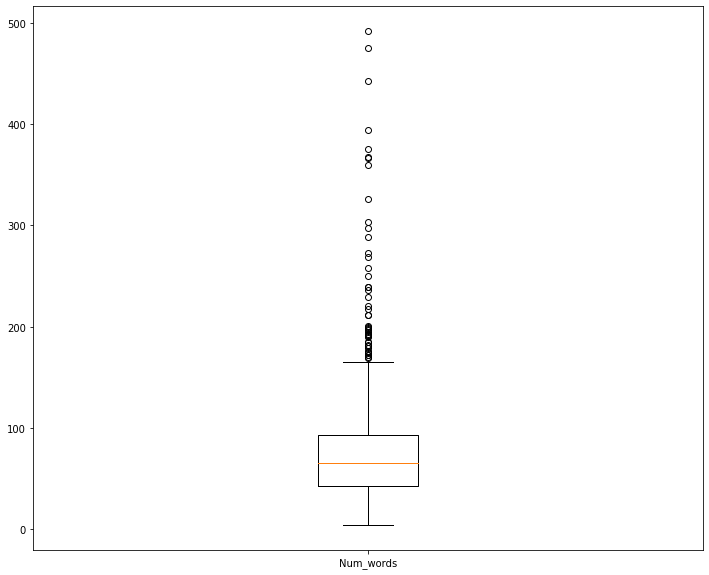

iqr 49.75
median: 65.0
q3: 92.75
maximum: 139.625


In [40]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12,10))
plt.boxplot([train_num_words], labels=["Num_words"])
plt.show()

df = pd.DataFrame({'num_words': train_num_words})
q1 = df['num_words'].quantile(0.25)
q3 = df['num_words'].quantile(0.75)
median = df['num_words'].median()
iqr = q3 - q1
maximum = median + 1.5 * iqr
print("iqr {}".format(iqr))
print("median: {}".format(median))
print("q3: {}".format(q3))
print("maximum: {}".format(maximum))

In [53]:
value = 100.0
sum(train_num_words >= q3)

435

In [50]:
import numpy as np

In [52]:
np.float(100)

100.0